Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 4s - 44ms/step - loss: 0.0332
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0191
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0189
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0185
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0178
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0162
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0128
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0075
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0036
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0030
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0030
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0029
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0028
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0028
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0028
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 20/100
94/94 - 0s - 4ms/step - loss: 0.0027
Epoch 21/100
94/94 -

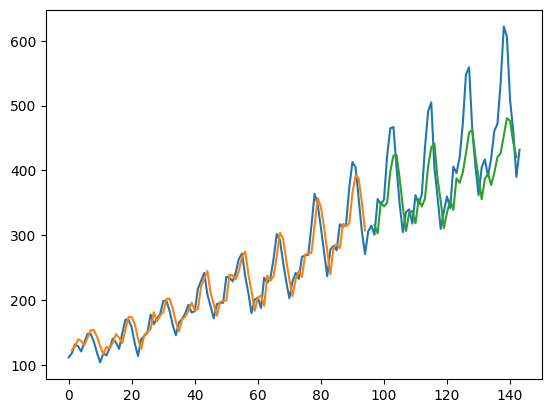

In [ ]:
	# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
modela = Sequential()
modela.add(LSTM(4, input_shape=(look_back, 1), return_sequences=True))
modela.add(LSTM(8,input_shape=(look_back,1), return_sequences=True))
modela.add(LSTM(16,input_shape=(look_back,1), return_sequences=True))
modela.add(LSTM(32, input_shape=(look_back,1),))
modela.add(Dense(1))
modela.compile(loss='mean_squared_error', optimizer='adam')
modela.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = modela.predict(trainX)
testPredict = modela.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 5s - 53ms/step - loss: 0.0276
Epoch 2/100
92/92 - 1s - 7ms/step - loss: 0.0179
Epoch 3/100
92/92 - 1s - 7ms/step - loss: 0.0144
Epoch 4/100
92/92 - 0s - 4ms/step - loss: 0.0083
Epoch 5/100
92/92 - 0s - 4ms/step - loss: 0.0072
Epoch 6/100
92/92 - 0s - 4ms/step - loss: 0.0071
Epoch 7/100
92/92 - 0s - 4ms/step - loss: 0.0070
Epoch 8/100
92/92 - 0s - 4ms/step - loss: 0.0069
Epoch 9/100
92/92 - 1s - 7ms/step - loss: 0.0068
Epoch 10/100
92/92 - 1s - 7ms/step - loss: 0.0068
Epoch 11/100
92/92 - 1s - 7ms/step - loss: 0.0067
Epoch 12/100
92/92 - 1s - 7ms/step - loss: 0.0067
Epoch 13/100
92/92 - 1s - 7ms/step - loss: 0.0066
Epoch 14/100
92/92 - 0s - 4ms/step - loss: 0.0065
Epoch 15/100
92/92 - 1s - 7ms/step - loss: 0.0065
Epoch 16/100
92/92 - 0s - 4ms/step - loss: 0.0064
Epoch 17/100
92/92 - 0s - 5ms/step - loss: 0.0064
Epoch 18/100
92/92 - 1s - 8ms/step - loss: 0.0064
Epoch 19/100
92/92 - 0s - 5ms/step - loss: 0.0063
Epoch 20/100
92/92 - 1s - 6ms/step - loss: 0.0063
Epoch 21/100
92/92 -

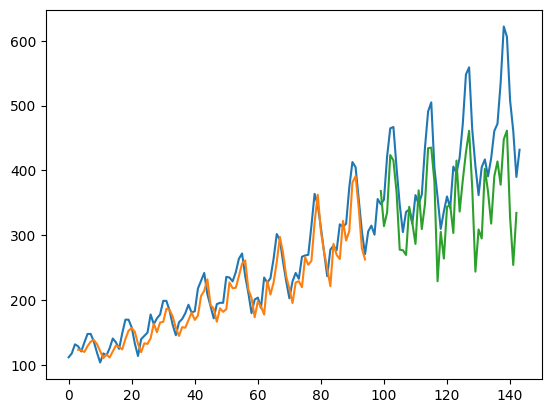

In [ ]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))  # Corrected shape
testX = np.reshape(testX, (testX.shape[0], look_back, 1))    # Corrected shape

# Create and fit the LSTM network
modelb = Sequential()
modelb.add(LSTM(4, input_shape=(look_back, 1), return_sequences=True))  # First LSTM layer
modelb.add(LSTM(8, return_sequences=True))  # Second LSTM layer
modelb.add(LSTM(16, return_sequences=True))  # Third LSTM layer
modelb.add(LSTM(32))  # Fourth LSTM layer (last, no return_sequences)
modelb.add(Dense(1))  # Fully connected layer
modelb.compile(loss='mean_squared_error', optimizer='adam')
modelb.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = modelb.predict(trainX)
testPredict = modelb.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
model1= Sequential()
model1.add(LSTM(4, input_shape=(look_back, 1)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 15ms/step - loss: 0.0322
Epoch 2/100
92/92 - 0s - 2ms/step - loss: 0.0131
Epoch 3/100
92/92 - 0s - 3ms/step - loss: 0.0106
Epoch 4/100
92/92 - 0s - 3ms/step - loss: 0.0090
Epoch 5/100
92/92 - 0s - 4ms/step - loss: 0.0077
Epoch 6/100
92/92 - 0s - 3ms/step - loss: 0.0066
Epoch 7/100
92/92 - 0s - 2ms/step - loss: 0.0057
Epoch 8/100
92/92 - 0s - 3ms/step - loss: 0.0051
Epoch 9/100
92/92 - 0s - 3ms/step - loss: 0.0046
Epoch 10/100
92/92 - 0s - 3ms/step - loss: 0.0043
Epoch 11/100
92/92 - 0s - 2ms/step - loss: 0.0042
Epoch 12/100
92/92 - 0s - 2ms/step - loss: 0.0040
Epoch 13/100
92/92 - 0s - 3ms/step - loss: 0.0040
Epoch 14/100
92/92 - 0s - 3ms/step - loss: 0.0039
Epoch 15/100
92/92 - 0s - 3ms/step - loss: 0.0039
Epoch 16/100
92/92 - 0s - 3ms/step - loss: 0.0039
Epoch 17/100
92/92 - 0s - 5ms/step - loss: 0.0039
Epoch 18/100
92/92 - 0s - 3ms/step - loss: 0.0039
Epoch 19/100
92/92 - 0s - 4ms/step - loss: 0.0038
Epoch 20/100
92/92 - 1s - 6ms/step - loss: 0.0038
Epoch 21/100
92/92 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 26.20 RMSE
Test Score: 65.55 RMSE


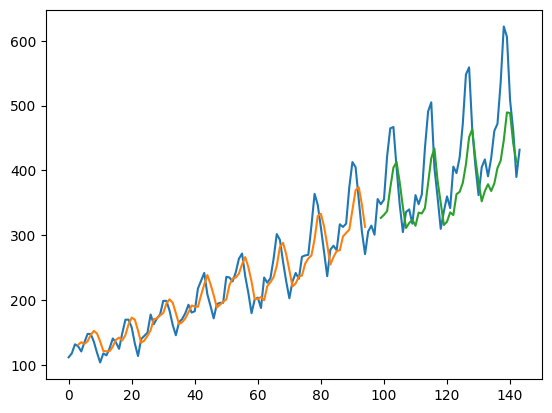

In [ ]:
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
trainY = trainY.reshape(-1)

model2 = Sequential()
model2.add(LSTM(4, input_shape=(look_back, 1), return_sequences=True))
model2.add(LSTM(8,input_shape=(look_back,1), return_sequences=True))
model2.add(LSTM(16,input_shape=(look_back,1), return_sequences=True))
model2.add(LSTM(32, input_shape=(look_back,1),))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


# make predictions
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = testY.reshape(-1, 1)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Ensure testY and testPredict have consistent lengths
print("Before adjustment:")
print("testY shape:", testY.shape)
print("testPredict shape:", testPredict.shape)

min_samples = min(testY.shape[0], testPredict.shape[0])
testY = testY[:min_samples]
testPredict = testPredict[:min_samples]

print("After adjustment:")
print("testY shape:", testY.shape)
print("testPredict shape:", testPredict.shape)

# Calculate RMSE
testScore = np.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
92/92 - 6s - 62ms/step - loss: 3714351336783872.0000
Epoch 2/100
92/92 - 0s - 4ms/step - loss: 3714349457735680.0000
Epoch 3/100
92/92 - 1s - 7ms/step - loss: 3714348920864768.0000
Epoch 4/100
92/92 - 1s - 7ms/step - loss: 3714348652429312.0000
Epoch 5/100
92/92 - 1s - 7ms/step - loss: 3714348115558400.0000
Epoch 6/100
92/92 - 1s - 7ms/step - loss: 3714348115558400.0000
Epoch 7/100
92/92 - 1s - 7ms/step - loss: 3714347041816576.0000
Epoch 8/100
92/92 - 0s - 4ms/step - loss: 3714347041816576.0000
Epoch 9/100
92/92 - 1s - 7ms/step - loss: 3714347041816576.0000
Epoch 10/100
92/92 - 1s - 8ms/step - loss: 3714346773381120.0000
Epoch 11/100
92/92 - 1s - 6ms/step - loss: 3714345968074752.0000
Epoch 12/100
92/92 - 1s - 6ms/step - loss: 3714345699639296.0000
Epoch 13/100
92/92 - 1s - 7ms/step - loss: 3714345699639296.0000
Epoch 14/100
92/92 - 0s - 4ms/step - loss: 3714345162768384.0000
Epoch 15/100
92/92 - 0s - 4ms/step - loss: 3714345162768384.0000
Epoch 16/100
92/92 - 1s - 7ms/ste

ValueError: Found input variables with inconsistent numbers of samples: [1, 44]